# Feature Selection using Mutual Information

This script calculates **Mutual Information (MI) scores** to measure feature relevance in predicting `Diabetic` status. Higher MI scores indicate stronger relationships between features and the target. Features are ranked based on their MI scores, helping in selecting the most informative predictors.


In [9]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Ensure the target is numerical
y = df['Diabetic']  # Target variable (already encoded as integer)

# Select all features (excluding target column)
features = df.drop(columns=['Diabetic'])

# Compute mutual information for features
mutual_info = mutual_info_classif(features, y)  # No need for discrete_values=True
mi_scores = pd.Series(mutual_info, index=features.columns).sort_values(ascending=False)

# Display Mutual Information Scores
print("Mutual Information Scores for Features:\n", mi_scores)


Mutual Information Scores for Features:
 GenHealth           0.055741
HeartDisease        0.042253
AgeCategory         0.038504
BMI                 0.036494
DiffWalking         0.030315
PhysicalHealth      0.022738
PhysicalActivity    0.018532
KidneyDisease       0.014878
Smoking             0.009922
Race                0.009352
Sex                 0.007664
SleepTime           0.007499
Stroke              0.006604
MentalHealth        0.005229
Asthma              0.003231
SkinCancer          0.002579
AlcoholDrinking     0.002452
dtype: float64


In [23]:
# Set a threshold for feature selection
threshold = 0.01

# Select features with mutual information score above the threshold
selected_features = mi_scores[mi_scores > threshold].index

# Filter the dataset to keep only the selected features
X_selected = df[selected_features]

# Now X_selected can be used for model training
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['GenHealth', 'HeartDisease', 'AgeCategory', 'BMI', 'DiffWalking',
       'PhysicalHealth', 'PhysicalActivity', 'KidneyDisease'],
      dtype='object')


### Feature Selection Based on Mutual Information

### Threshold for Selection:
A **mutual information threshold of 0.01** is applied to retain only the most relevant features.

### Selected Features:
The following features have a **mutual information score greater than 0.01** and are selected for model training:

- **GenHealth (0.0557)**
- **HeartDisease (0.0423)**
- **AgeCategory (0.0385)**
- **BMI (0.0365)**
- **DiffWalking (0.0303)**
- **PhysicalHealth (0.0227)**
- **PhysicalActivity (0.0185)**
- **KidneyDisease (0.0149)**

#### Dataset Filtering:
- The dataset (`df`) is filtered to **retain only these selected features**.
- The new dataset `X_selected` contains the most relevant predictors for diabetes classification.

This refined feature set will enhance model efficiency and performance by eliminating less relevant variables.
___


## Feature Selection with Mutual Information

- **Objective**: Select the most relevant features for predicting diabetes.
- **Method**:
  1. Load dataset and extract features.
  2. Compute mutual information scores.
  3. Retain features with scores > 0.01.
  4. Save the filtered dataset for model training.

This process improves model performance by focusing on the most significant predictors.


In [27]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
df = pd.read_csv('standardized_encoded_data.csv')

# Assuming y is the target variable (Diabetic)
y = df['Diabetic']

# Select features excluding the target
features = df.drop(columns=['Diabetic'])

# Compute mutual information scores
mutual_info = mutual_info_classif(features, y)
mi_scores = pd.Series(mutual_info, index=features.columns).sort_values(ascending=False)

# Set a threshold for feature selection
threshold = 0.01

# Select features with mutual information score above the threshold
selected_features = mi_scores[mi_scores > threshold].index

# Filter the dataset to keep only the selected features along with the target variable
df_selected = df[selected_features.tolist() + ['Diabetic']]

# Save the updated dataframe
df_selected.to_csv('df_selected_features.csv', index=False)

# Display the updated dataframe
print(df_selected.head())


   GenHealth  HeartDisease       BMI  AgeCategory  DiffWalking  \
0          3             0 -0.656682            7            0   
1          5             0  0.312391           12            0   
2          5             0  0.122679           13            0   
3          4             1  0.312391           13            0   
4          2             0 -1.297603           10            0   

   PhysicalActivity  PhysicalHealth  Race  KidneyDisease  Diabetic  
0                 1        1.957316     3              0         0  
1                 1       -0.627790     5              0         0  
2                 1       -0.627790     5              0         0  
3                 1       -0.627790     5              0         0  
4                 1       -0.627790     5              0         0  


### **Selected Features**:
- **GenHealth**: General health condition.
- **HeartDisease**: Presence of heart disease (binary).
- **BMI**: Standardized Body Mass Index.
- **AgeCategory**: Age group (categorical).
- **DiffWalking**: Difficulty in walking (binary).
- **PhysicalActivity**: Engagement in physical activity (binary).
- **PhysicalHealth**: Self-reported physical health status.
- **Race**: Categorical race identifier.
- **KidneyDisease**: Presence of kidney disease (binary).

### **Target Variable**:
- **Diabetic**: Indicates whether a person has diabetes (binary).

The dataset has been filtered to include only the most relevant features for predicting diabetes.


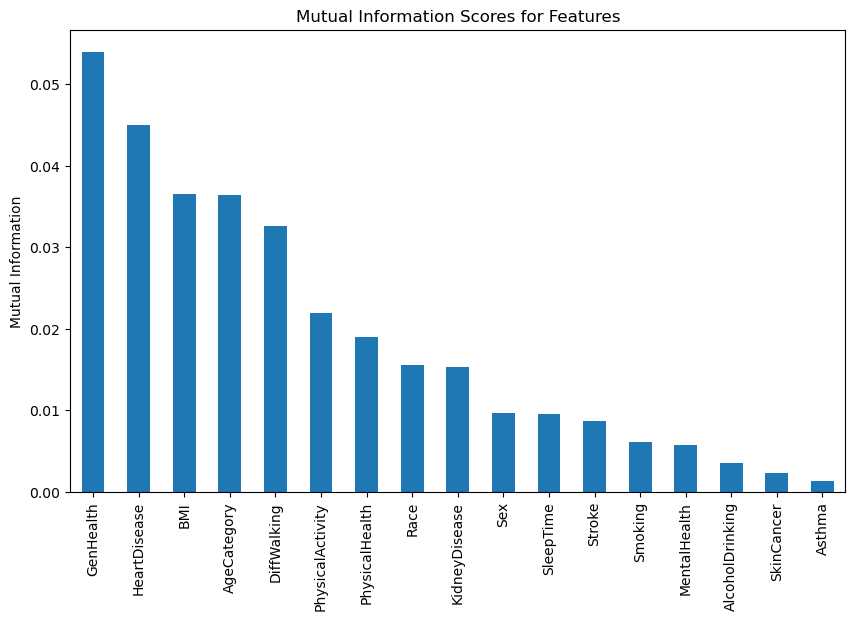

In [29]:
import matplotlib.pyplot as plt

# Plot mutual information scores
mi_scores.plot(kind='bar', figsize=(10, 6))
plt.title("Mutual Information Scores for Features")
plt.ylabel("Mutual Information")
plt.show()

# You can visually inspect the chart to select an appropriate threshold


# Recursive Feature Elimination (RFE)

- Used **RandomForestClassifier** to apply **RFE** and select the **top 10 features**.
- Filtered the dataset to retain only selected features and the target (**Diabetic**).
- Trained a model using the selected features and evaluated its accuracy.
- Saved the refined dataset as `df_selected_rfe_features.csv`.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply RFE (Recursive Feature Elimination)
selector = RFE(clf, n_features_to_select=10)  # Select top 10 features
selector = selector.fit(features, y)

# Get the selected features
selected_features_rfe = features.columns[selector.support_]
print("Selected Features using RFE:\n", selected_features_rfe)

# Filter the dataset to keep only the selected features
df_selected_rfe = df[selected_features_rfe.tolist() + ['Diabetic']]

# Save the updated dataframe
df_selected_rfe.to_csv('df_selected_rfe_features.csv', index=False)

# Model training using selected features
clf.fit(df_selected_rfe.drop(columns='Diabetic'), y)
accuracy = clf.score(df_selected_rfe.drop(columns='Diabetic'), y)
print("Model Accuracy using RFE Features: ", accuracy)


Selected Features using RFE:
 Index(['HeartDisease', 'BMI', 'Smoking', 'PhysicalHealth', 'MentalHealth',
       'Sex', 'AgeCategory', 'Race', 'GenHealth', 'SleepTime'],
      dtype='object')
Model Accuracy using RFE Features:  0.9923478025326742


# Feature Selection using Random Forest

Applied **RandomForestClassifier** to determine feature importance, selected relevant features (**importance > 0.01**), trained the model, and saved the refined dataset as `df_selected_rf_features.csv`.


In [3]:
from sklearn.ensemble import RandomForestClassifier

import pandas as pd

# Load the dataset
df = pd.read_csv('wins_encoded_data.csv')

# Assuming y is the target variable (Diabetic)
y = df['Diabetic']

# Select features excluding the target
features = df.drop(columns=['Diabetic'])


# Define a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(features, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances using Random Forest:\n", feature_importances)

# Select features with importance greater than a threshold (e.g., 0.01)
selected_features_rf = feature_importances[feature_importances > 0.01].index
print("Selected Features using Random Forest:\n", selected_features_rf)

# Filter the dataset to keep only the selected features
df_selected_rf = df[selected_features_rf.tolist() + ['Diabetic']]

# Save the updated dataframe
df_selected_rf.to_csv('df_selected_rf_features.csv', index=False)

# Model training using selected features
rf.fit(df_selected_rf.drop(columns='Diabetic'), y)
accuracy = rf.score(df_selected_rf.drop(columns='Diabetic'), y)
print("Model Accuracy using Random Forest Features: ", accuracy)


Feature Importances using Random Forest:
 BMI                 0.298620
AgeCategory         0.124102
SleepTime           0.107013
GenHealth           0.071772
PhysicalHealth      0.062847
MentalHealth        0.054455
Race                0.042253
HeartDisease        0.039408
Smoking             0.032290
Sex                 0.028721
DiffWalking         0.025896
PhysicalActivity    0.024487
Asthma              0.023446
SkinCancer          0.021236
KidneyDisease       0.017874
Stroke              0.016533
AlcoholDrinking     0.009045
dtype: float64
Selected Features using Random Forest:
 Index(['BMI', 'AgeCategory', 'SleepTime', 'GenHealth', 'PhysicalHealth',
       'MentalHealth', 'Race', 'HeartDisease', 'Smoking', 'Sex', 'DiffWalking',
       'PhysicalActivity', 'Asthma', 'SkinCancer', 'KidneyDisease', 'Stroke'],
      dtype='object')
Model Accuracy using Random Forest Features:  0.9979684431502674
